# First Step of Fitting -- Crop Defects into patches

In [6]:
import os
print(os.getcwd())
os.chdir("/Users/mingrenshen/Projects/multitype-defect-detection/")

/Users/mingrenshen/Projects/multitype-defect-detection


In [7]:
# Import Package
import os
import cv2
import chainer
import math
from utils import imageUtils
from utils import postProcessing
from utils import MultiDefectDetectionDataset
from utils import evaluation
from utils import visualization
import numpy as np
from PIL import Image
from chainercv.links import FasterRCNNVGG16
from chainercv.visualizations import vis_bbox
from chainercv.utils import write_image
from chainercv import utils
%matplotlib inline
import matplotlib.pyplot as plt

#load Data
root = './data/3Types/Data3TypesYminXminYmaxXmax9'
#dataset = MultiDefectDetectionDataset(data_dir=root, split='train')
dataset_val = MultiDefectDetectionDataset(data_dir=root, split='validation2')
bbox_label_names = ('111', 'dot','100')
# DataSet Statistics
# print('total number of training images: ', len(dataset))
print('total number of test images: ', len(dataset_val))
print('type of defects: ', bbox_label_names)

('total number of test images: ', 12)
('type of defects: ', ('111', 'dot', '100'))


In [8]:
# Running Faster R-CNN prediction model
use_gpu = False
# Higher NMS
proposal_params = {'min_size': 8,'nms_thresh':0.4}
model = FasterRCNNVGG16(n_fg_class=3,
                        pretrained_model='BestWeigghtPerformance/BestWeight_20190702.npz',
                        ratios=[ 0.5, 1, 1.5, 2, 2.5, 3,4,6], anchor_scales=[1, 4, 8, 16], min_size=1024,
                        max_size=1024, proposal_creator_params=proposal_params)

model.score_thresh = 0.25

if use_gpu:
    chainer.cuda.get_device_from_id(0).use()
    model.to_gpu()

0
14
1
25
2
134
3
142
4
249
5
88
6
176
7
58
8
145
9
144
10
39
11
31


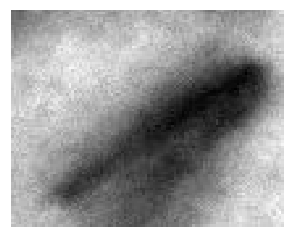

In [9]:
resultFolder = './RawResult0p15/'
# Loop all testing images
with open(resultFolder+"log.txt",'w') as logFile:
    for imgID in range(len(dataset_val)):
        logFile.write("%d , %s \n"%(imgID,dataset_val.get_image_name(imgID)))
        # Creating the storing folder
        try:
            os.mkdir(resultFolder+str(imgID))
            print(imgID)
        except OSError:
            print("Creation of the directory is failed")
        # Run Faster R-CNN Fitting
        img, bbox, labels = dataset_val[imgID]
        bboxes, labels, scores = model.predict([img])
        # Expand BBoxes
        _, H, W = img.shape
        bboxes = bboxes[0]
        bboxes = imageUtils.expand_bbox_with_rate(bboxes, H, W, 0.15)
        subimages = list()
        for bbox in bboxes:
            bbox = bbox.astype(np.int)
            subimages.append(img[:, bbox[0]:bbox[2]+1, bbox[1]:bbox[3]+1])
        print(len(subimages))
        # Saving BBox Information
        with open(resultFolder+"results_"+str(imgID)+".csv",'w') as tmpCSV:
            # write the col name information
            tmpCSV.write("%s,%s,%s,%s,%s,%s\n"%("id","Ymin","Xmin","Ymax","Xmax","class"))
            for row in range(len(labels[0])):
                #print(row)
                tmpCSV.write("%d,%f,%f,%f,%f,%d\n"%(row, bboxes[row][0],bboxes[row][1],bboxes[row][2],bboxes[row][3],labels[0][row]))
                #cv2.imshow("cropped", subimages[i])       
                #cv2.imwrite('./crop_set1_final/'+str(i+1)+'/'+str(l)+'.jpg', crop_im1)
                plt.axis("off")
                fig=plt.imshow(subimages[row].transpose((1, 2, 0))[:, :, 0], cmap='gray')
                fig.axes.get_xaxis().set_visible(False)
                fig.axes.get_yaxis().set_visible(False)
                plt.savefig(resultFolder+str(imgID)+"/"+str(row)+".jpg",bbox_inches='tight', pad_inches = 0, format='jpg')
                #plt.imshow(subimages[row].transpose((1, 2, 0))[:, :, 0], cmap='gray')
                #fig.savefig(str(imgID)+"/"+str(row)+".jpg", pad_inches = 0, bbox_inches='tight')
                #plt.axis('off')
                #plt.savefig(str(imgID)+"/"+str(row)+".jpg",dpi=150,bbox_inches='tight')

0
14
1
25
2
134
3
142
4
249
5
88
6
176
7
58
8
145
9
144
10
39
11
31


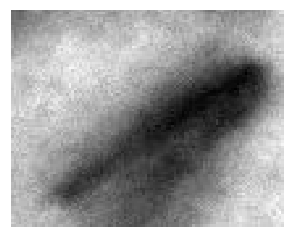

In [10]:
resultFolder = './RawResult0p1/'
# Loop all testing images
with open(resultFolder+"log.txt",'w') as logFile:
    for imgID in range(len(dataset_val)):
        logFile.write("%d , %s \n"%(imgID,dataset_val.get_image_name(imgID)))
        # Creating the storing folder
        try:
            os.mkdir(resultFolder+str(imgID))
            print(imgID)
        except OSError:
            print("Creation of the directory is failed")
        # Run Faster R-CNN Fitting
        img, bbox, labels = dataset_val[imgID]
        bboxes, labels, scores = model.predict([img])
        # Expand BBoxes
        _, H, W = img.shape
        bboxes = bboxes[0]
        bboxes = imageUtils.expand_bbox_with_rate(bboxes, H, W, 0.1)
        subimages = list()
        for bbox in bboxes:
            bbox = bbox.astype(np.int)
            subimages.append(img[:, bbox[0]:bbox[2]+1, bbox[1]:bbox[3]+1])
        print(len(subimages))
        # Saving BBox Information
        with open(resultFolder+"results_"+str(imgID)+".csv",'w') as tmpCSV:
            # write the col name information
            tmpCSV.write("%s,%s,%s,%s,%s,%s\n"%("id","Ymin","Xmin","Ymax","Xmax","class"))
            for row in range(len(labels[0])):
                #print(row)
                tmpCSV.write("%d,%f,%f,%f,%f,%d\n"%(row, bboxes[row][0],bboxes[row][1],bboxes[row][2],bboxes[row][3],labels[0][row]))
                #cv2.imshow("cropped", subimages[i])       
                #cv2.imwrite('./crop_set1_final/'+str(i+1)+'/'+str(l)+'.jpg', crop_im1)
                plt.axis("off")
                fig=plt.imshow(subimages[row].transpose((1, 2, 0))[:, :, 0], cmap='gray')
                fig.axes.get_xaxis().set_visible(False)
                fig.axes.get_yaxis().set_visible(False)
                plt.savefig(resultFolder+str(imgID)+"/"+str(row)+".jpg",bbox_inches='tight', pad_inches = 0, format='jpg')
                #plt.imshow(subimages[row].transpose((1, 2, 0))[:, :, 0], cmap='gray')
                #fig.savefig(str(imgID)+"/"+str(row)+".jpg", pad_inches = 0, bbox_inches='tight')
                #plt.axis('off')
                #plt.savefig(str(imgID)+"/"+str(row)+".jpg",dpi=150,bbox_inches='tight')

0
14
1
25
2
134
3
142
4
249
5
88
6
176
7
58
8
145
9
144
10
39
11
31


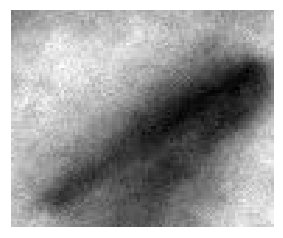

In [11]:
resultFolder = './RawResult0p05/'
# Loop all testing images
with open(resultFolder+"log.txt",'w') as logFile:
    for imgID in range(len(dataset_val)):
        logFile.write("%d , %s \n"%(imgID,dataset_val.get_image_name(imgID)))
        # Creating the storing folder
        try:
            os.mkdir(resultFolder+str(imgID))
            print(imgID)
        except OSError:
            print("Creation of the directory is failed")
        # Run Faster R-CNN Fitting
        img, bbox, labels = dataset_val[imgID]
        bboxes, labels, scores = model.predict([img])
        # Expand BBoxes
        _, H, W = img.shape
        bboxes = bboxes[0]
        bboxes = imageUtils.expand_bbox_with_rate(bboxes, H, W, 0.05)
        subimages = list()
        for bbox in bboxes:
            bbox = bbox.astype(np.int)
            subimages.append(img[:, bbox[0]:bbox[2]+1, bbox[1]:bbox[3]+1])
        print(len(subimages))
        # Saving BBox Information
        with open(resultFolder+"results_"+str(imgID)+".csv",'w') as tmpCSV:
            # write the col name information
            tmpCSV.write("%s,%s,%s,%s,%s,%s\n"%("id","Ymin","Xmin","Ymax","Xmax","class"))
            for row in range(len(labels[0])):
                #print(row)
                tmpCSV.write("%d,%f,%f,%f,%f,%d\n"%(row, bboxes[row][0],bboxes[row][1],bboxes[row][2],bboxes[row][3],labels[0][row]))
                #cv2.imshow("cropped", subimages[i])       
                #cv2.imwrite('./crop_set1_final/'+str(i+1)+'/'+str(l)+'.jpg', crop_im1)
                plt.axis("off")
                fig=plt.imshow(subimages[row].transpose((1, 2, 0))[:, :, 0], cmap='gray')
                fig.axes.get_xaxis().set_visible(False)
                fig.axes.get_yaxis().set_visible(False)
                plt.savefig(resultFolder+str(imgID)+"/"+str(row)+".jpg",bbox_inches='tight', pad_inches = 0, format='jpg')
                #plt.imshow(subimages[row].transpose((1, 2, 0))[:, :, 0], cmap='gray')
                #fig.savefig(str(imgID)+"/"+str(row)+".jpg", pad_inches = 0, bbox_inches='tight')
                #plt.axis('off')
                #plt.savefig(str(imgID)+"/"+str(row)+".jpg",dpi=150,bbox_inches='tight')

Creation of the directory is failed
14
Creation of the directory is failed
25
Creation of the directory is failed
134
Creation of the directory is failed
142
Creation of the directory is failed
249
Creation of the directory is failed
88
Creation of the directory is failed
176
Creation of the directory is failed
58
Creation of the directory is failed
145
Creation of the directory is failed
144
Creation of the directory is failed
39
Creation of the directory is failed
31


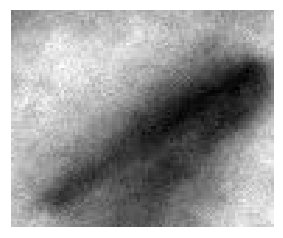

In [13]:
resultFolder = './RawResult0p0/'
# Loop all testing images
with open(resultFolder+"log.txt",'w') as logFile:
    for imgID in range(len(dataset_val)):
        logFile.write("%d , %s \n"%(imgID,dataset_val.get_image_name(imgID)))
        # Creating the storing folder
        try:
            os.mkdir(resultFolder+str(imgID))
            print(imgID)
        except OSError:
            print("Creation of the directory is failed")
        # Run Faster R-CNN Fitting
        img, bbox, labels = dataset_val[imgID]
        bboxes, labels, scores = model.predict([img])
        # Expand BBoxes
        _, H, W = img.shape
        bboxes = bboxes[0]
        bboxes = imageUtils.expand_bbox_with_rate(bboxes, H, W, 0.0)
        subimages = list()
        for bbox in bboxes:
            bbox = bbox.astype(np.int)
            subimages.append(img[:, bbox[0]:bbox[2]+1, bbox[1]:bbox[3]+1])
        print(len(subimages))
        # Saving BBox Information
        with open(resultFolder+"results_"+str(imgID)+".csv",'w') as tmpCSV:
            # write the col name information
            tmpCSV.write("%s,%s,%s,%s,%s,%s\n"%("id","Ymin","Xmin","Ymax","Xmax","class"))
            for row in range(len(labels[0])):
                #print(row)
                tmpCSV.write("%d,%f,%f,%f,%f,%d\n"%(row, bboxes[row][0],bboxes[row][1],bboxes[row][2],bboxes[row][3],labels[0][row]))
                #cv2.imshow("cropped", subimages[i])       
                #cv2.imwrite('./crop_set1_final/'+str(i+1)+'/'+str(l)+'.jpg', crop_im1)
                plt.axis("off")
                fig=plt.imshow(subimages[row].transpose((1, 2, 0))[:, :, 0], cmap='gray')
                fig.axes.get_xaxis().set_visible(False)
                fig.axes.get_yaxis().set_visible(False)
                plt.savefig(resultFolder+str(imgID)+"/"+str(row)+".jpg",bbox_inches='tight', pad_inches = 0, format='jpg')
                #plt.imshow(subimages[row].transpose((1, 2, 0))[:, :, 0], cmap='gray')
                #fig.savefig(str(imgID)+"/"+str(row)+".jpg", pad_inches = 0, bbox_inches='tight')
                #plt.axis('off')
                #plt.savefig(str(imgID)+"/"+str(row)+".jpg",dpi=150,bbox_inches='tight')